### 2-1. 타이타닉 생존여부 예측모델 만들기

In [356]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index":"id"})
        id_name = 'id'
    
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])
    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

In [357]:
df = pd.read_csv('./titanic/train.csv')
X_train, X_test, y_train, y_test = data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [358]:
# 모듈 로딩
import pandas as pd

In [359]:
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

In [360]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [361]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [362]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [363]:
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

In [364]:
y = y_train['Survived']

# get_dummies 함수는 범주형 변수만 처리함
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [365]:
X.shape, test.shape

((712, 5), (179, 5))

#### 모델링 및 평가

In [366]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X, y)
predictions = model.predict(test)

In [367]:
model.score(X, y)

0.8356741573033708

In [368]:
output = pd.DataFrame({'PassengerId' : X_test.PassengerId, 'Survived' : predictions})

In [369]:
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


#### 결과 채점

In [370]:
model.score(test, y_test['Survived'])

0.7318435754189944

### 2-2. 당뇨병 여부 판단

In [371]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index":"id"})
        id_name = 'id'
    
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])
    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

In [372]:
df = pd.read_csv('./archive/diabetes.csv')
X_train, X_test, y_train, y_test = data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [373]:
# 모듈 로딩
import pandas as pd

In [374]:
# 데이터 로딩
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [375]:
X_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [376]:
y_train.head()

,id,Outcome
147,147,0
344,344,0
390,390,0
150,150,0
132,132,1


In [377]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [378]:
X_train.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [379]:
X_test.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [380]:
X_train.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.978827,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,219.881344,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,196.500000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,388.000000,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,575.750000,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,766.000000,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


#### 데이터 전처리

In [381]:
# 이상치 확인
# Train Data
print('Glucose :', len(X_train[X_train['Glucose']==0]))
print('BloodPressure :', len(X_train[X_train['BloodPressure']==0]))
print('SkinThickness :', len(X_train[X_train['SkinThickness']==0]))
print('Insulin :', len(X_train[X_train['Insulin']==0]))
print('BMI :', len(X_train[X_train['BMI']==0]))

Glucose : 5
BloodPressure : 31
SkinThickness : 175
Insulin : 287
BMI : 9


In [382]:
# Test Data
print('Glucose :', len(X_test[X_test['Glucose']==0]))
print('BloodPressure :', len(X_test[X_test['BloodPressure']==0]))
print('SkinThickness :', len(X_test[X_test['SkinThickness']==0]))
print('Insulin :', len(X_test[X_test['Insulin']==0]))
print('BMI :', len(X_test[X_test['BMI']==0]))

Glucose : 0
BloodPressure : 4
SkinThickness : 52
Insulin : 87
BMI : 2


##### 포도당은 train 데이터에만 0 값이 있으므로 삭제함
##### 나머지 이상치는 평균값으로 대체함

In [383]:
# 포도당 이상치
del_idx = X_train[(X_train['Glucose']==0)].index
del_idx

Int64Index([182, 75, 342, 502, 349], dtype='int64')

In [384]:
print(X_train.shape, y_train.shape)
X_train = X_train.drop(index=del_idx, axis=0)
y_train = y_train.drop(index=del_idx, axis=0)
print(X_train.shape, y_train.shape)

(614, 9) (614, 2)
(609, 9) (609, 2)


In [385]:
# 이상치를 평균값으로 대체
cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols_mean = X_train[cols].mean()
X_train[cols].replace(0, cols_mean)

,BloodPressure,SkinThickness,Insulin,BMI
147,64.0,35.00000,119.000000,30.5
344,72.0,20.91133,82.866995,36.8
390,66.0,29.00000,196.000000,32.0
150,74.0,50.00000,204.000000,37.4
132,64.0,37.00000,225.000000,34.5
...,...,...,...,...
621,76.0,20.00000,82.866995,24.2
128,88.0,24.00000,145.000000,34.5
57,88.0,60.00000,110.000000,46.8
341,74.0,21.00000,73.000000,25.9


In [386]:
X_train.columns

Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [387]:
X = X_train.iloc[:,1:]
test = X_test.iloc[:,1:]

In [388]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.fit_transform(test)

In [389]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X, y_train['Outcome'])
predictions = model.predict(test)

In [390]:
round(model.score(X, y_train['Outcome'])*100, 2)

83.42

In [391]:
output = pd.DataFrame({'idx':X_test.index, 'Outcome':predictions})
output.head()

,idx,Outcome
0,258,1
1,220,1
2,438,0
3,130,1
4,730,0


In [392]:
round(model.score(test, y_test['Outcome'])*100, 2)

76.62

#### 성인 인구조사 소득 예측

In [393]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

In [394]:
df = pd.read_csv('./archive/adult.csv')

In [395]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [396]:
X_train, X_test, y_train, y_test = data_load(df, target='income', null_name='?')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048, 2), (6513, 2))

In [397]:
# 모듈 로딩
import pandas as pd
import numpy as np

In [398]:
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [399]:
y_train['income'].value_counts()

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [400]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26048 non-null  int64 
 1   age             26048 non-null  int64 
 2   workclass       24592 non-null  object
 3   fnlwgt          26048 non-null  int64 
 4   education       26048 non-null  object
 5   education.num   26048 non-null  int64 
 6   marital.status  26048 non-null  object
 7   occupation      24585 non-null  object
 8   relationship    26048 non-null  object
 9   race            26048 non-null  object
 10  sex             26048 non-null  object
 11  capital.gain    26048 non-null  int64 
 12  capital.loss    26048 non-null  int64 
 13  hours.per.week  26048 non-null  int64 
 14  native.country  25587 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.2+ MB


In [401]:
X_train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [402]:
num_col = []
cate_col = []
for col in X_train.columns:
    col_dtype = X_train[col].dtype
    if col_dtype == 'int64':
        num_col.append(col)
    elif col_dtype == 'object':
        cate_col.append(col)
    

In [403]:
num_col, cate_col

(['id',
  'age',
  'fnlwgt',
  'education.num',
  'capital.gain',
  'capital.loss',
  'hours.per.week'],
 ['workclass',
  'education',
  'marital.status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native.country'])

In [404]:
num_col.remove('id')

In [405]:
num_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [406]:
X_train[num_col].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [407]:
X_train[cate_col].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,24592,26048,26048,24585,26048,26048,26048,25587
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,18160,8408,11987,3323,10558,22270,17400,23381


##### 결측치 처리

In [408]:
X_train.isnull().sum()

id                   0
age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [409]:
X_test.isnull().sum()

id                  0
age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [410]:
X_train['workclass'].value_counts()

Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: workclass, dtype: int64

In [411]:
X_train['occupation'].value_counts()

Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: occupation, dtype: int64

In [412]:
X_train['native.country'].value_counts()

United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece                      

In [413]:
def df_fillna(df):
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna('null')
    df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])
    return df

In [414]:
X_train = df_fillna(X_train)
X_test = df_fillna(X_test)

In [415]:
X_train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [416]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind='train'), X_test.assign(ind='test')])
le = LabelEncoder()
all_df

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ind
21851,21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,train
7632,7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,train
27878,27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States,train
14121,14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,train
32345,32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,31222,22,Private,199426,Some-college,10,Never-married,null,Not-in-family,White,Female,0,0,40,United-States,test
10861,10861,41,Private,155106,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,test
8929,8929,32,Private,153078,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,South,test
2066,2066,48,State-gov,171926,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States,test


In [417]:
all_df[cate_col] = all_df[cate_col].apply(le.fit_transform)
all_df

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ind
21851,21851,36,3,241998,9,13,2,2,0,4,1,0,0,50,38,train
7632,7632,53,3,103950,12,14,0,9,1,4,0,0,0,40,38,train
27878,27878,19,3,203061,15,10,4,12,1,4,0,0,0,25,38,train
14121,14121,20,3,102607,11,9,4,5,3,4,1,0,0,30,38,train
32345,32345,54,6,138852,11,9,2,9,0,4,1,0,0,40,38,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,31222,22,3,199426,15,10,4,14,1,4,0,0,0,40,38,test
10861,10861,41,3,155106,11,9,2,5,0,4,1,0,0,40,38,test
8929,8929,32,3,153078,9,13,4,7,1,1,1,0,0,40,34,test
2066,2066,48,6,171926,14,15,2,9,0,4,1,15024,0,50,38,test


In [418]:
X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind', axis=1)

X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind', axis=1)

In [419]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

In [420]:
y = (y_train['income'] != '<=50K').astype(int)
y

21851    1
7632     0
27878    0
14121    0
32345    0
        ..
2669     1
17536    0
6201     0
27989    0
25716    0
Name: income, Length: 26048, dtype: int32

#### 검증용 데이터 분리

In [421]:
# 학습용 데이터와 검증용 데이터로 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [422]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((20838, 15), (5210, 15), (20838,), (5210,))

In [423]:
X_tr = X_tr.drop('id', axis=1)
X_val = X_val.drop('id', axis=1)

In [424]:
X_tr

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
23401,0.410959,3,0.147954,11,0.533333,2,7,0,2,1,0.0,0.0,0.602041,38
28826,0.369863,3,0.076864,10,1.000000,2,3,0,4,1,0.0,0.0,0.602041,38
24052,0.123288,3,0.105642,9,0.800000,2,14,5,4,0,0.0,0.0,0.193878,38
10516,0.178082,3,0.074043,15,0.600000,0,11,3,4,1,0.0,0.0,0.397959,38
7041,0.410959,3,0.067425,8,0.666667,0,14,1,4,1,0.0,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18467,0.246575,3,0.134274,1,0.400000,5,8,4,4,0,0.0,0.0,0.071429,25
6019,0.465753,3,0.101328,11,0.533333,0,7,4,4,0,0.0,0.0,0.377551,38
31964,0.479452,0,0.043361,15,0.600000,2,3,5,1,0,0.0,0.0,0.397959,38
8237,0.000000,3,0.114977,1,0.400000,4,7,3,4,0,0.0,0.0,0.153061,38


#### 모델링 및 평가

In [425]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score :', (accuracy_score(y_val, pred)))

accuracy score : 0.8120921305182341


In [426]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score :', (accuracy_score(y_val, pred)))

accuracy score : 0.8520153550863724


In [427]:
# test 데이터 예측
X_test_id = X_test['id']
X_test = X_test.drop('id', axis=1)
pred = model.predict(X_test)

In [428]:
output = pd.DataFrame({'id' : X_test_id, 'income' : pred})
output

,id,income
20901,20901,1
14170,14170,0
1776,1776,1
30428,30428,0
8602,8602,0
...,...,...
31222,31222,0
10861,10861,1
8929,8929,0
2066,2066,1


#### 채점

In [429]:
y_test = (y_test['income'] != '<=50K').astype(int)
print('accuracy score :', (accuracy_score(y_test, pred)))

accuracy score : 0.8483033932135728


### 집값 회귀분석

In [430]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 

In [431]:
df = pd.read_csv('./archive/house_prices.csv')

In [432]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [433]:
X_train, X_test, y_train, y_test = data_load(df, target='SalePrice', id_name='Id')

In [434]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

In [435]:
# 모듈 로딩
import pandas as pd

In [436]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [437]:
# 컬럼 100개까지 확인 가능
pd.set_option("display.max_columns", 100)
display(X_train.head(3))
display(X_test.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,983,1683,GasA,Ex,Y,SBrkr,2129,743,0,2872,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


<AxesSubplot:>

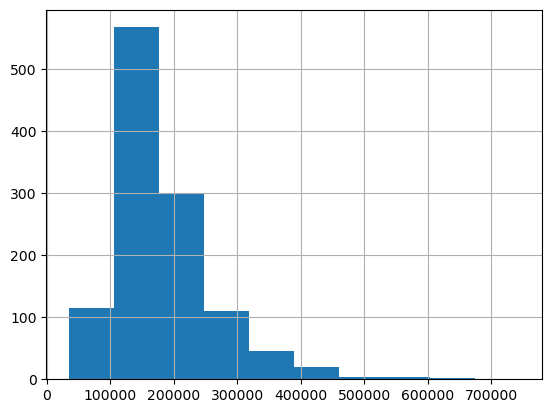

In [438]:
y_train['SalePrice'].hist()

<AxesSubplot:>

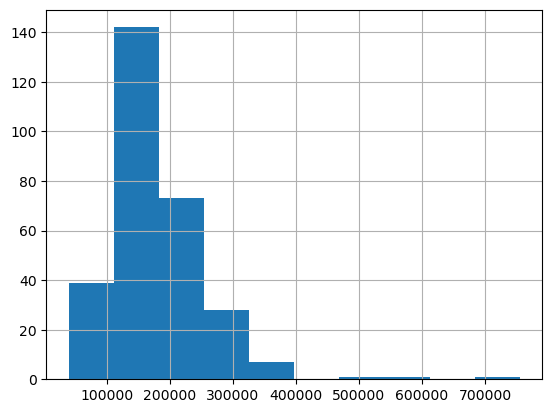

In [439]:
y_test['SalePrice'].hist()

In [440]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [441]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

In [442]:
# object 타입이 아닌 컬럼만 선택하여 
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

In [443]:
# sklearn의 SimpleImputer : 2개 이상의 column을 한번에 처리할때
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [444]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.2, random_state=42)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((934, 36), (234, 36), (934,), (234,))

#### Modeling

In [445]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [447]:
# XGBoost
model = XGBRegressor()
model.fit(X_tr, y_tr, verbose=False)
pred = model.predict(X_val)

print('R2 : ' + str(r2_score(y_val, pred)))
print('RMSE : ' + str(rmse(y_val, pred)))

R2 : 0.7905564333520707
RMSE : 36178.25879321676


In [448]:
# RandomForest
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print('R2 : ' + str(r2_score(y_val, pred)))
print('RMSE : ' + str(rmse(y_val, pred)))

R2 : 0.8416228113762585
RMSE : 31460.1264103034


In [449]:
y = y_train['SalePrice']

In [450]:
final_model = XGBRegressor()
final_model.fit(X_train, y)

prediction = final_model.predict(X_test)

#### Prediction

In [451]:
submission = pd.DataFrame(data={'id':y_test.Id, 'income':prediction})

#### 결과 채점

In [452]:
pred = model.predict(X_test)
print('R2 : ' + str(r2_score(y_test['SalePrice'], prediction)))
print('RMSE : ' + str(rmse(y_test['SalePrice'], prediction)))

R2 : 0.8902345949704513
RMSE : 25308.81766179412


#### 의료 비용 데이터

In [453]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 

In [454]:
df = pd.read_csv('./archive/insurance.csv')

In [455]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [456]:
X_train, X_test, y_train, y_test = data_load(df, target='charges')

In [457]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

In [458]:
X_train.head()

,id,age,sex,bmi,children,smoker,region
209,209,40,male,41.230,1,no,northeast
540,540,34,female,38.000,3,no,southwest
747,747,19,male,21.755,0,no,northwest
39,39,60,male,39.900,0,yes,southwest
640,640,33,male,42.400,5,no,southwest


In [459]:
y_train.head()

,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300


<AxesSubplot:>

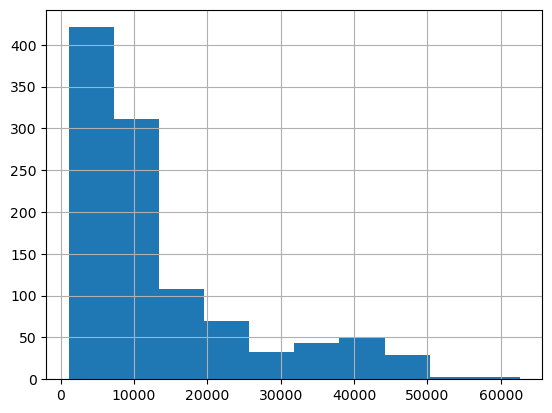

In [460]:
y_train['charges'].hist()

In [461]:
X_train.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [462]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [463]:
cols = X_train.select_dtypes('object').columns

In [464]:
for col in cols:
    print('[train]')
    print(X_train[col].value_counts())
    print('[test]')
    print(X_test[col].value_counts())
    print()

[train]
male      551
female    519
Name: sex, dtype: int64
[test]
female    143
male      125
Name: sex, dtype: int64

[train]
no     845
yes    225
Name: smoker, dtype: int64
[test]
no     219
yes     49
Name: smoker, dtype: int64

[train]
southeast    304
northeast    266
southwest    261
northwest    239
Name: region, dtype: int64
[test]
northwest    86
southwest    64
southeast    60
northeast    58
Name: region, dtype: int64



#### Preprocessing

In [465]:
X_train = pd.get_dummies(X_train, columns=cols)
X_test = pd.get_dummies(X_test, columns=cols)

In [466]:
X_train

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
209,209,40,41.230,1,0,1,1,0,1,0,0,0
540,540,34,38.000,3,1,0,1,0,0,0,0,1
747,747,19,21.755,0,0,1,1,0,0,1,0,0
39,39,60,39.900,0,0,1,0,1,0,0,0,1
640,640,33,42.400,5,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44,44,38,37.050,1,0,1,1,0,1,0,0,0
621,621,37,34.100,4,0,1,0,1,0,0,0,1
1152,1152,43,32.560,3,1,0,0,1,0,0,1,0
57,57,18,31.680,2,0,1,0,1,0,0,1,0


#### 로그 변환

<AxesSubplot:>

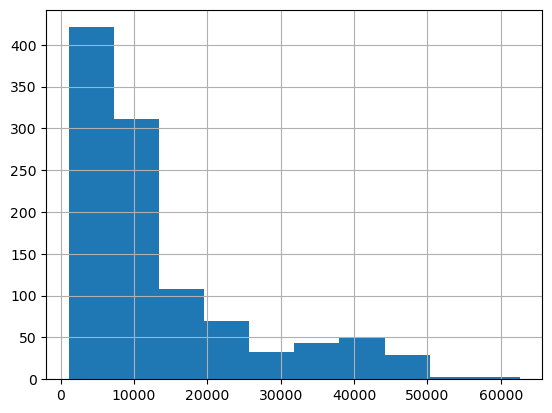

In [467]:
y_train['charges'].hist()

In [468]:
y_train['charges'] = np.log1p(y_train['charges'])

<AxesSubplot:>

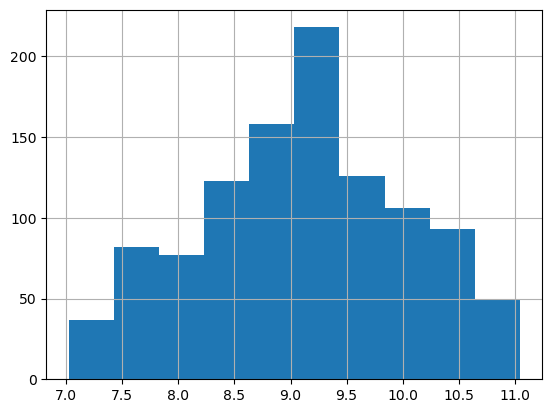

In [469]:
y_train['charges'].hist()

#### Standard Scaler

In [470]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train['bmi'] = ss.fit_transform(X_train[['bmi']])
X_test['bmi'] = ss.transform(X_test[['bmi']])

#### Label Encoding

In [471]:
X_train['age'] = (X_train['age']//10)
X_test['age'] = (X_test['age']//10)

In [472]:
X_train['age']

209     4
540     3
747     1
39      6
640     3
       ..
44      3
621     3
1152    4
57      1
1140    5
Name: age, Length: 1070, dtype: int64

#### Train-Validation Split

In [473]:
target = y_train['charges']
X_train = X_train.drop('id', axis=1)

In [474]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.2, random_state=42)

In [475]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((856, 11), (214, 11), (856,), (214,))

In [476]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [477]:
from sklearn.metrics import mean_squared_error
def rmse2(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

rmse2(y_val, pred)

0.32106614502997705

In [478]:
def rmse(y, pred):
    return np.sqrt(np.mean((y - pred)**2))

rmse(y_val, pred)

0.3210661450299771

In [479]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)

In [480]:
rmse2(y_val, pred)

0.3939661554924201

In [481]:
rf.fit(X_train, y_train['charges'])
pred = rf.predict(X_test.drop('id', axis=1))

In [482]:
pred = np.exp(pred)
output = pd.DataFrame({'id':y_test['id'], 'charges':pred})
output.head()

,id,charges
1088,1088,9734.062793
1157,1157,4321.064710
1267,1267,34292.857710
506,506,2928.575471
659,659,12236.327427


#### 결과 채점

In [483]:
rmse(y_test['charges'], pred)

4778.993278976281

#### 빅데이터 분석기사 기출 4회 작업형2

In [484]:
import pandas as pd

In [485]:
train = pd.read_csv('./archive/train_2.csv')
test = pd.read_csv('./archive/test_2.csv')

In [486]:
train.shape, test.shape

((6665, 11), (2154, 10))

In [487]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [488]:
train.Segmentation.value_counts()

4    1757
3    1720
1    1616
2    1572
Name: Segmentation, dtype: int64

In [489]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [490]:
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [491]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [492]:
target = train.pop('Segmentation')

In [493]:
target

0       4
1       2
2       2
3       3
4       3
       ..
6660    2
6661    4
6662    4
6663    2
6664    2
Name: Segmentation, Length: 6665, dtype: int64

In [494]:
test_ID = test.pop('ID')

In [495]:
test_ID

0       458989
1       458994
2       459000
3       459003
4       459005
         ...  
2149    467950
2150    467954
2151    467958
2152    467961
2153    467968
Name: ID, Length: 2154, dtype: int64

In [496]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 520.8+ KB


In [497]:
train = train[['Age', 'Work_Experience', 'Family_Size']]
test = test[['Age', 'Work_Experience', 'Family_Size']]

In [498]:
train.shape, target.shape

((6665, 3), (6665,))

#### Modeling

In [499]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

In [500]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [501]:
from sklearn.metrics import f1_score
from sklearn import metrics
print(metrics.classification_report(y_val, pred, digits=3))

              precision    recall  f1-score   support

           1      0.298     0.298     0.298       315
           2      0.287     0.252     0.268       302
           3      0.387     0.434     0.409       346
           4      0.562     0.554     0.558       370

    accuracy                          0.394      1333
   macro avg      0.383     0.384     0.383      1333
weighted avg      0.392     0.394     0.392      1333



In [502]:
# submit = pd.DataFrame({'ID':test_ID, 'Segmentation':pred})

ValueError: array length 1333 does not match index length 2154

In [ ]:
submit

,ID,Segmentation
0,458989,2
1,458994,3
2,459000,3
3,459003,3
4,459005,2
...,...,...
2149,467950,1
2150,467954,4
2151,467958,4
2152,467961,3


#### 범주형 데이터 활용

In [ ]:
import pandas as pd

In [ ]:
# 데이터 로딩
train = pd.read_csv('./archive/train_2.csv')
test = pd.read_csv('./archive/test_2.csv')

In [ ]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [ ]:
train.describe()

,ID,Age,Work_Experience,Family_Size,Segmentation
count,6665.00000,6665.000000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110,2.542836
std,2566.43174,16.524054,3.405365,1.524743,1.122723
min,458982.00000,18.000000,0.000000,1.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000,3.000000
75%,465741.00000,53.000000,4.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000,4.000000


#### Preprocessing

In [ ]:
# OneHotEncoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
target = train.pop('Segmentation')
target

0       4
1       2
2       2
3       3
4       3
       ..
6660    2
6661    4
6662    4
6663    2
6664    2
Name: Segmentation, Length: 6665, dtype: int64

In [ ]:
train = train.drop('ID', axis=1)
train.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,56,0.0,2.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics

print(metrics.classification_report(y_val, pred, digits=3))

              precision    recall  f1-score   support

           1      0.399     0.438     0.418       315
           2      0.359     0.325     0.341       302
           3      0.500     0.500     0.500       346
           4      0.633     0.630     0.631       370

    accuracy                          0.482      1333
   macro avg      0.473     0.473     0.472      1333
weighted avg      0.481     0.482     0.481      1333



### 빅데이터 분석기사 실기 3회 작업형2

In [503]:
import pandas as pd

In [504]:
# 데이터 로딩
train = pd.read_csv('./BDAC_3/t2-1-train.csv')
test = pd.read_csv('./BDAC_3/t2-1-test.csv')

In [505]:
train.shape, test.shape

((1490, 10), (497, 9))

In [506]:
train.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,10000,28,Private Sector/Self Employed,Yes,1250000.0,6,1,No,No,0
1,10001,31,Private Sector/Self Employed,Yes,1250000.0,7,1,No,No,0
2,10002,29,Private Sector/Self Employed,Yes,1200000.0,7,0,No,No,1
3,10003,33,Government Sector,Yes,650000.0,6,1,No,No,1
4,10004,28,Private Sector/Self Employed,Yes,800000.0,6,0,No,Yes,1


In [507]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1490 non-null   int64  
 1   Age                  1490 non-null   int64  
 2   Employment Type      1490 non-null   object 
 3   GraduateOrNot        1490 non-null   object 
 4   AnnualIncome         1486 non-null   float64
 5   FamilyMembers        1490 non-null   int64  
 6   ChronicDiseases      1490 non-null   int64  
 7   FrequentFlyer        1490 non-null   object 
 8   EverTravelledAbroad  1490 non-null   object 
 9   TravelInsurance      1490 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 116.5+ KB


In [508]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   497 non-null    int64  
 1   Age                  497 non-null    int64  
 2   Employment Type      497 non-null    object 
 3   GraduateOrNot        497 non-null    object 
 4   AnnualIncome         494 non-null    float64
 5   FamilyMembers        497 non-null    int64  
 6   ChronicDiseases      497 non-null    int64  
 7   FrequentFlyer        497 non-null    object 
 8   EverTravelledAbroad  497 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 35.1+ KB


In [509]:
train.describe(include='object')

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1056,1270,1175,1209


In [510]:
test.describe(include='object')

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,497,497,497,497
unique,3,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,360,422,395,398


In [511]:
train['Employment Type'].value_counts()

Private Sector/Self Employed    1056
Government Sector                434
Name: Employment Type, dtype: int64

In [512]:
test['Employment Type'].value_counts()

Private Sector/Self Employed    360
Government Sector               134
Casual employment                 3
Name: Employment Type, dtype: int64

In [516]:
test = test.drop(test.loc[test['Employment Type']=='Casual employment'].index)

In [517]:
test['Employment Type'].value_counts()

Private Sector/Self Employed    360
Government Sector               134
Name: Employment Type, dtype: int64

In [ ]:
train.describe(exclude='object')

,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.486000e+03,1490.000000,1490.000000,1490.000000
mean,10744.500000,29.600000,9.311238e+05,4.755705,0.280537,0.352349
std,430.270264,2.887829,3.764874e+05,1.603613,0.449412,0.477862
min,10000.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,10372.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,10744.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,11116.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,11489.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
test.describe(exclude='object')

,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.940000e+02,497.000000,497.000000
mean,248.000000,29.800805,9.393725e+05,4.744467,0.269618
std,143.615807,2.986286,3.792988e+05,1.629211,0.444208
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000
25%,124.000000,28.000000,6.000000e+05,4.000000,0.000000
50%,248.000000,29.000000,9.000000e+05,5.000000,0.000000
75%,372.000000,33.000000,1.250000e+06,6.000000,1.000000
max,496.000000,35.000000,1.750000e+06,9.000000,1.000000


#### 결측치 처리

In [518]:
train.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           4
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [519]:
test.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           3
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [520]:
train.AnnualIncome = train.AnnualIncome.fillna(train.AnnualIncome.mean())
test.AnnualIncome = test.AnnualIncome.fillna(test.AnnualIncome.mean())

In [521]:
target = train.pop('TravelInsurance')
target

0       0
1       0
2       1
3       1
4       1
       ..
1485    0
1486    0
1487    1
1488    0
1489    0
Name: TravelInsurance, Length: 1490, dtype: int64

#### LabelEncoding

In [525]:
# 데이터 합치기
df = pd.concat([train, test])
df.shape

(1984, 9)

In [526]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [527]:
# 데이터 분리
train = df[:train.shape[0]].copy()
test = df[:test.shape[0]].copy()

#### Scaling

In [531]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

train.AnnualIncome = mm.fit_transform(train[['AnnualIncome']])
test.AnnualIncome = mm.transform(test[['AnnualIncome']])

#### 데이터 분리

In [532]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

In [533]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1192, 9), (298, 9), (1192,), (298,))

#### Modeling

In [534]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)